# Mapping Global Data

## Applying geospatial visualisation tool (e.g. GeoPandas) on the dataset provided

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import pycountry
import pycountry_convert as pc
from pycountry_convert import country_alpha2_to_continent_code, country_name_to_country_alpha2
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.express as px
import cufflinks
cufflinks.go_offline()
cufflinks.set_config_file(world_readable=True, theme='pearl', offline=True)
import warnings
from pandas.core.common import SettingWithCopyWarning
warnings.simplefilter(action="ignore", category=SettingWithCopyWarning)

In [2]:
# Reading the CSV files and converting them into dataframes

In [3]:
pop_df = pd.read_csv("C:\API_SP.POP.TOTL_DS2_en_csv_v2_1637443.csv", skiprows = 4)
pop_df

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,Unnamed: 65
0,Aruba,ABW,"Population, total",SP.POP.TOTL,54211.0,55438.0,56225.0,56695.0,57032.0,57360.0,...,102560.0,103159.0,103774.0,104341.0,104872.0,105366.0,105845.0,106314.0,NaN,NaN
1,Afghanistan,AFG,"Population, total",SP.POP.TOTL,8996973.0,9169410.0,9351441.0,9543205.0,9744781.0,9956320.0,...,31161376.0,32269589.0,33370794.0,34413603.0,35383128.0,36296400.0,37172386.0,38041754.0,NaN,NaN
2,Angola,AGO,"Population, total",SP.POP.TOTL,5454933.0,5531472.0,5608539.0,5679458.0,5735044.0,5770570.0,...,25107931.0,26015780.0,26941779.0,27884381.0,28842484.0,29816748.0,30809762.0,31825295.0,NaN,NaN
3,Albania,ALB,"Population, total",SP.POP.TOTL,1608800.0,1659800.0,1711319.0,1762621.0,1814135.0,1864791.0,...,2900401.0,2895092.0,2889104.0,2880703.0,2876101.0,2873457.0,2866376.0,2854191.0,NaN,NaN
4,Andorra,AND,"Population, total",SP.POP.TOTL,13411.0,14375.0,15370.0,16412.0,17469.0,18549.0,...,82427.0,80774.0,79213.0,78011.0,77297.0,77001.0,77006.0,77142.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
259,Kosovo,XKX,"Population, total",SP.POP.TOTL,947000.0,966000.0,994000.0,1022000.0,1050000.0,1078000.0,...,1807106.0,1818117.0,1812771.0,1788196.0,1777557.0,1791003.0,1797085.0,1794248.0,NaN,NaN
260,"Yemen, Rep.",YEM,"Population, total",SP.POP.TOTL,5315355.0,5393036.0,5473671.0,5556766.0,5641597.0,5727751.0,...,24473178.0,25147109.0,25823485.0,26497889.0,27168210.0,27834821.0,28498687.0,29161922.0,NaN,NaN
261,South Africa,ZAF,"Population, total",SP.POP.TOTL,17099840.0,17524533.0,17965725.0,18423161.0,18896307.0,19384841.0,...,52834005.0,53689236.0,54545991.0,55386367.0,56203654.0,57000451.0,57779622.0,58558270.0,NaN,NaN
262,Zambia,ZMB,"Population, total",SP.POP.TOTL,3070776.0,3164329.0,3260650.0,3360104.0,3463213.0,3570464.0,...,14465121.0,14926504.0,15399753.0,15879361.0,16363507.0,16853688.0,17351822.0,17861030.0,NaN,NaN


In [4]:
gdp_df = pd.read_csv("C:\API_NY.GDP.MKTP.KD_DS2_en_csv_v2_1622113.csv", skiprows = 4)
gdp_df

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,Unnamed: 65
0,Aruba,ABW,GDP (constant 2010 US$),NY.GDP.MKTP.KD,NaN,NaN,NaN,NaN,NaN,NaN,...,2.439006e+09,2.541401e+09,2.549025e+09,2.694320e+09,2.750900e+09,2.805918e+09,NaN,NaN,NaN,NaN
1,Afghanistan,AFG,GDP (constant 2010 US$),NY.GDP.MKTP.KD,NaN,NaN,NaN,NaN,NaN,NaN,...,1.795488e+10,1.896048e+10,1.947707e+10,1.975974e+10,2.020638e+10,2.074494e+10,2.112666e+10,2.173959e+10,NaN,NaN
2,Angola,AGO,GDP (constant 2010 US$),NY.GDP.MKTP.KD,NaN,NaN,NaN,NaN,NaN,NaN,...,9.411581e+10,9.877886e+10,1.035426e+11,1.045196e+11,1.018229e+11,1.016730e+11,9.963591e+10,9.876968e+10,NaN,NaN
3,Albania,ALB,GDP (constant 2010 US$),NY.GDP.MKTP.KD,NaN,NaN,NaN,NaN,NaN,NaN,...,1.240388e+10,1.252816e+10,1.275047e+10,1.303338e+10,1.346541e+10,1.397739e+10,1.454645e+10,1.486852e+10,NaN,NaN
4,Andorra,AND,GDP (constant 2010 US$),NY.GDP.MKTP.KD,NaN,NaN,NaN,NaN,NaN,NaN,...,3.278086e+09,3.161792e+09,3.240978e+09,3.287459e+09,3.409413e+09,3.421212e+09,3.475567e+09,3.539838e+09,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
259,Kosovo,XKX,GDP (constant 2010 US$),NY.GDP.MKTP.KD,NaN,NaN,NaN,NaN,NaN,NaN,...,6.262389e+09,6.477787e+09,6.556957e+09,6.825477e+09,7.103339e+09,7.403500e+09,7.685989e+09,8.006622e+09,NaN,NaN
260,"Yemen, Rep.",YEM,GDP (constant 2010 US$),NY.GDP.MKTP.KD,NaN,NaN,NaN,NaN,NaN,NaN,...,2.762254e+10,2.895489e+10,2.890028e+10,2.080981e+10,1.885888e+10,1.790235e+10,1.803709e+10,NaN,NaN,NaN
261,South Africa,ZAF,GDP (constant 2010 US$),NY.GDP.MKTP.KD,7.907096e+10,8.211104e+10,8.718376e+10,9.361236e+10,1.010450e+11,1.072317e+11,...,3.962572e+11,4.061050e+11,4.136057e+11,4.185431e+11,4.202134e+11,4.261574e+11,4.295115e+11,4.301669e+11,NaN,NaN
262,Zambia,ZMB,GDP (constant 2010 US$),NY.GDP.MKTP.KD,4.592976e+09,4.655504e+09,4.539543e+09,4.688094e+09,5.260700e+09,6.136473e+09,...,2.301863e+10,2.418280e+10,2.531884e+10,2.605814e+10,2.704230e+10,2.798995e+10,2.911929e+10,2.961601e+10,NaN,NaN


In [5]:
# Checking for null values and replacing them with zeros

In [6]:
pop_df1 = pop_df.fillna(0)
pop_df1

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,Unnamed: 65
0,Aruba,ABW,"Population, total",SP.POP.TOTL,54211.0,55438.0,56225.0,56695.0,57032.0,57360.0,...,102560.0,103159.0,103774.0,104341.0,104872.0,105366.0,105845.0,106314.0,0.0,0.0
1,Afghanistan,AFG,"Population, total",SP.POP.TOTL,8996973.0,9169410.0,9351441.0,9543205.0,9744781.0,9956320.0,...,31161376.0,32269589.0,33370794.0,34413603.0,35383128.0,36296400.0,37172386.0,38041754.0,0.0,0.0
2,Angola,AGO,"Population, total",SP.POP.TOTL,5454933.0,5531472.0,5608539.0,5679458.0,5735044.0,5770570.0,...,25107931.0,26015780.0,26941779.0,27884381.0,28842484.0,29816748.0,30809762.0,31825295.0,0.0,0.0
3,Albania,ALB,"Population, total",SP.POP.TOTL,1608800.0,1659800.0,1711319.0,1762621.0,1814135.0,1864791.0,...,2900401.0,2895092.0,2889104.0,2880703.0,2876101.0,2873457.0,2866376.0,2854191.0,0.0,0.0
4,Andorra,AND,"Population, total",SP.POP.TOTL,13411.0,14375.0,15370.0,16412.0,17469.0,18549.0,...,82427.0,80774.0,79213.0,78011.0,77297.0,77001.0,77006.0,77142.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
259,Kosovo,XKX,"Population, total",SP.POP.TOTL,947000.0,966000.0,994000.0,1022000.0,1050000.0,1078000.0,...,1807106.0,1818117.0,1812771.0,1788196.0,1777557.0,1791003.0,1797085.0,1794248.0,0.0,0.0
260,"Yemen, Rep.",YEM,"Population, total",SP.POP.TOTL,5315355.0,5393036.0,5473671.0,5556766.0,5641597.0,5727751.0,...,24473178.0,25147109.0,25823485.0,26497889.0,27168210.0,27834821.0,28498687.0,29161922.0,0.0,0.0
261,South Africa,ZAF,"Population, total",SP.POP.TOTL,17099840.0,17524533.0,17965725.0,18423161.0,18896307.0,19384841.0,...,52834005.0,53689236.0,54545991.0,55386367.0,56203654.0,57000451.0,57779622.0,58558270.0,0.0,0.0
262,Zambia,ZMB,"Population, total",SP.POP.TOTL,3070776.0,3164329.0,3260650.0,3360104.0,3463213.0,3570464.0,...,14465121.0,14926504.0,15399753.0,15879361.0,16363507.0,16853688.0,17351822.0,17861030.0,0.0,0.0


In [7]:
gdp_df1 = gdp_df.fillna(0)
gdp_df1

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,Unnamed: 65
0,Aruba,ABW,GDP (constant 2010 US$),NY.GDP.MKTP.KD,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,2.439006e+09,2.541401e+09,2.549025e+09,2.694320e+09,2.750900e+09,2.805918e+09,0.000000e+00,0.000000e+00,0.0,0.0
1,Afghanistan,AFG,GDP (constant 2010 US$),NY.GDP.MKTP.KD,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,1.795488e+10,1.896048e+10,1.947707e+10,1.975974e+10,2.020638e+10,2.074494e+10,2.112666e+10,2.173959e+10,0.0,0.0
2,Angola,AGO,GDP (constant 2010 US$),NY.GDP.MKTP.KD,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,9.411581e+10,9.877886e+10,1.035426e+11,1.045196e+11,1.018229e+11,1.016730e+11,9.963591e+10,9.876968e+10,0.0,0.0
3,Albania,ALB,GDP (constant 2010 US$),NY.GDP.MKTP.KD,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,1.240388e+10,1.252816e+10,1.275047e+10,1.303338e+10,1.346541e+10,1.397739e+10,1.454645e+10,1.486852e+10,0.0,0.0
4,Andorra,AND,GDP (constant 2010 US$),NY.GDP.MKTP.KD,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,3.278086e+09,3.161792e+09,3.240978e+09,3.287459e+09,3.409413e+09,3.421212e+09,3.475567e+09,3.539838e+09,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
259,Kosovo,XKX,GDP (constant 2010 US$),NY.GDP.MKTP.KD,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,6.262389e+09,6.477787e+09,6.556957e+09,6.825477e+09,7.103339e+09,7.403500e+09,7.685989e+09,8.006622e+09,0.0,0.0
260,"Yemen, Rep.",YEM,GDP (constant 2010 US$),NY.GDP.MKTP.KD,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,2.762254e+10,2.895489e+10,2.890028e+10,2.080981e+10,1.885888e+10,1.790235e+10,1.803709e+10,0.000000e+00,0.0,0.0
261,South Africa,ZAF,GDP (constant 2010 US$),NY.GDP.MKTP.KD,7.907096e+10,8.211104e+10,8.718376e+10,9.361236e+10,1.010450e+11,1.072317e+11,...,3.962572e+11,4.061050e+11,4.136057e+11,4.185431e+11,4.202134e+11,4.261574e+11,4.295115e+11,4.301669e+11,0.0,0.0
262,Zambia,ZMB,GDP (constant 2010 US$),NY.GDP.MKTP.KD,4.592976e+09,4.655504e+09,4.539543e+09,4.688094e+09,5.260700e+09,6.136473e+09,...,2.301863e+10,2.418280e+10,2.531884e+10,2.605814e+10,2.704230e+10,2.798995e+10,2.911929e+10,2.961601e+10,0.0,0.0


In [8]:
# Converting all the values from float64 data type to int64 data type in both dataframes

In [9]:
pop_df1.loc[:, pop_df1.dtypes == 'float64'] = pop_df1.loc[:, pop_df1.dtypes == 'float64'].astype('int64')
gdp_df1.loc[:, gdp_df1.dtypes == 'float64'] = gdp_df1.loc[:, gdp_df1.dtypes == 'float64'].astype('int64')

In [10]:
pop_df1

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,Unnamed: 65
0,Aruba,ABW,"Population, total",SP.POP.TOTL,54211,55438,56225,56695,57032,57360,...,102560,103159,103774,104341,104872,105366,105845,106314,0,0
1,Afghanistan,AFG,"Population, total",SP.POP.TOTL,8996973,9169410,9351441,9543205,9744781,9956320,...,31161376,32269589,33370794,34413603,35383128,36296400,37172386,38041754,0,0
2,Angola,AGO,"Population, total",SP.POP.TOTL,5454933,5531472,5608539,5679458,5735044,5770570,...,25107931,26015780,26941779,27884381,28842484,29816748,30809762,31825295,0,0
3,Albania,ALB,"Population, total",SP.POP.TOTL,1608800,1659800,1711319,1762621,1814135,1864791,...,2900401,2895092,2889104,2880703,2876101,2873457,2866376,2854191,0,0
4,Andorra,AND,"Population, total",SP.POP.TOTL,13411,14375,15370,16412,17469,18549,...,82427,80774,79213,78011,77297,77001,77006,77142,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
259,Kosovo,XKX,"Population, total",SP.POP.TOTL,947000,966000,994000,1022000,1050000,1078000,...,1807106,1818117,1812771,1788196,1777557,1791003,1797085,1794248,0,0
260,"Yemen, Rep.",YEM,"Population, total",SP.POP.TOTL,5315355,5393036,5473671,5556766,5641597,5727751,...,24473178,25147109,25823485,26497889,27168210,27834821,28498687,29161922,0,0
261,South Africa,ZAF,"Population, total",SP.POP.TOTL,17099840,17524533,17965725,18423161,18896307,19384841,...,52834005,53689236,54545991,55386367,56203654,57000451,57779622,58558270,0,0
262,Zambia,ZMB,"Population, total",SP.POP.TOTL,3070776,3164329,3260650,3360104,3463213,3570464,...,14465121,14926504,15399753,15879361,16363507,16853688,17351822,17861030,0,0


In [11]:
gdp_df1

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,Unnamed: 65
0,Aruba,ABW,GDP (constant 2010 US$),NY.GDP.MKTP.KD,0,0,0,0,0,0,...,2439005748,2541400876,2549025078,2694319530,2750900229,2805918209,0,0,0,0
1,Afghanistan,AFG,GDP (constant 2010 US$),NY.GDP.MKTP.KD,0,0,0,0,0,0,...,17954877146,18960483969,19477070577,19759744157,20206376461,20744935406,21126660585,21739593381,0,0
2,Angola,AGO,GDP (constant 2010 US$),NY.GDP.MKTP.KD,0,0,0,0,0,0,...,94115810020,98778862974,103542597659,104519600360,101822893032,101673002179,99635905543,98769677172,0,0
3,Albania,ALB,GDP (constant 2010 US$),NY.GDP.MKTP.KD,0,0,0,0,0,0,...,12403877841,12528163103,12750473701,13033375121,13465406059,13977387390,14546448944,14868516510,0,0
4,Andorra,AND,GDP (constant 2010 US$),NY.GDP.MKTP.KD,0,0,0,0,0,0,...,3278085642,3161792390,3240978390,3287458570,3409412700,3421211719,3475566750,3539838260,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
259,Kosovo,XKX,GDP (constant 2010 US$),NY.GDP.MKTP.KD,0,0,0,0,0,0,...,6262389283,6477787349,6556956792,6825476981,7103338658,7403499506,7685988855,8006622151,0,0
260,"Yemen, Rep.",YEM,GDP (constant 2010 US$),NY.GDP.MKTP.KD,0,0,0,0,0,0,...,27622540063,28954889799,28900283353,20809811298,18858879105,17902354868,18037087754,0,0,0
261,South Africa,ZAF,GDP (constant 2010 US$),NY.GDP.MKTP.KD,79070958914,82111040763,87183764869,93612358102,101044974951,107231717095,...,396257207214,406104993310,413605718439,418543065568,420213420422,426157392310,429511487805,430166850678,0,0
262,Zambia,ZMB,GDP (constant 2010 US$),NY.GDP.MKTP.KD,4592975693,4655503637,4539542515,4688094181,5260700256,6136473014,...,23018629943,24182795063,25318837276,26058142315,27042299847,27989950178,29119291926,29616006733,0,0


In [12]:
# Dropping the columns, setting the index to Column Name, calculating the GDP per capita and replacing the null values with zeros

In [13]:
pop_df2 = pop_df1.drop(['Country Code','Indicator Name','Indicator Code'], axis = 1) # Dropping the columns 
gdp_df2 = gdp_df1.drop(['Country Code','Indicator Name','Indicator Code'], axis = 1) 
pop_df2.set_index(['Country Name'], inplace = True) # Setting the index to Country Code
gdp_df2.set_index(['Country Name'], inplace = True)
World_GDP_percapita = gdp_df2.div(pop_df2) # Calculating the GDP per capita 
WorldGDP_PC = World_GDP_percapita.fillna(0).reset_index() # Check for null values and replacing them with zeros
WorldGDP_PC

,Country Name,1960,1961,1962,1963,1964,1965,1966,1967,1968,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,Unnamed: 65
0,Aruba,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,23781.257293,24635.764945,24563.234317,25822.251368,26231.026671,26630.205275,0.000000,0.000000,0.0,0.0
1,Afghanistan,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,576.190125,587.565090,583.656193,574.184114,571.073775,571.542506,568.342871,571.466641,0.0,0.0
2,Angola,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,3748.449445,3796.882622,3843.198241,3748.320623,3530.309422,3409.929285,3233.907018,3103.496045,0.0,0.0
3,Albania,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,4276.607904,4327.379960,4413.296891,4524.373086,4681.826563,4864.310616,5074.857222,5209.362832,0.0,0.0
4,Andorra,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,39769.561454,39143.689677,40914.728517,42140.961787,44107.956324,44430.744003,45133.713607,45887.302118,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
259,Kosovo,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,3465.424432,3562.910060,3617.090516,3816.962448,3996.124264,4133.716976,4276.920043,4462.383211,0.0,0.0
260,"Yemen, Rep.",0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1128.686273,1151.420221,1119.147294,785.338458,694.152434,643.164002,632.909430,0.000000,0.0,0.0
261,South Africa,4624.075951,4685.490949,4852.783000,5081.232157,5347.339824,5531.730546,5631.012847,5882.849417,5970.579403,...,7500.041067,7563.992777,7582.696929,7556.788579,7476.621012,7476.386324,7433.615398,7345.962418,0.0,0.0
262,Zambia,1495.705220,1471.245132,1392.220114,1395.222940,1519.023016,1718.676624,1573.797740,1646.598331,1615.678326,...,1591.319557,1620.124516,1644.106712,1641.006985,1652.598055,1660.761145,1678.169124,1658.135434,0.0,0.0


In [14]:
pop_df3 = pop_df1.filter(["Country Code"], axis = 1) # Filtering the Country code column from population dataframe
WorldGDP_PC1 = pd.concat([WorldGDP_PC, pop_df3], axis = 1) # Adding the Country Code column to World GDP dataframe by concatinating it
WorldGDP_PC1.insert(1,'Country Code', WorldGDP_PC1.pop("Country Code")) # Changing the column position of Country Code 
WorldGDP_PC1

,Country Name,Country Code,1960,1961,1962,1963,1964,1965,1966,1967,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,Unnamed: 65
0,Aruba,ABW,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,23781.257293,24635.764945,24563.234317,25822.251368,26231.026671,26630.205275,0.000000,0.000000,0.0,0.0
1,Afghanistan,AFG,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,576.190125,587.565090,583.656193,574.184114,571.073775,571.542506,568.342871,571.466641,0.0,0.0
2,Angola,AGO,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,3748.449445,3796.882622,3843.198241,3748.320623,3530.309422,3409.929285,3233.907018,3103.496045,0.0,0.0
3,Albania,ALB,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,4276.607904,4327.379960,4413.296891,4524.373086,4681.826563,4864.310616,5074.857222,5209.362832,0.0,0.0
4,Andorra,AND,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,39769.561454,39143.689677,40914.728517,42140.961787,44107.956324,44430.744003,45133.713607,45887.302118,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
259,Kosovo,XKX,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,3465.424432,3562.910060,3617.090516,3816.962448,3996.124264,4133.716976,4276.920043,4462.383211,0.0,0.0
260,"Yemen, Rep.",YEM,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1128.686273,1151.420221,1119.147294,785.338458,694.152434,643.164002,632.909430,0.000000,0.0,0.0
261,South Africa,ZAF,4624.075951,4685.490949,4852.783000,5081.232157,5347.339824,5531.730546,5631.012847,5882.849417,...,7500.041067,7563.992777,7582.696929,7556.788579,7476.621012,7476.386324,7433.615398,7345.962418,0.0,0.0
262,Zambia,ZMB,1495.705220,1471.245132,1392.220114,1395.222940,1519.023016,1718.676624,1573.797740,1646.598331,...,1591.319557,1620.124516,1644.106712,1641.006985,1652.598055,1660.761145,1678.169124,1658.135434,0.0,0.0


In [15]:
# Deriving alpha-2 country codes through country names

In [16]:
country_name = WorldGDP_PC1['Country Name']

In [17]:
countries = {}
for country in pycountry.countries:
    countries[country.name] = country.alpha_2

codes = [countries.get(country, 'Unknown code') for country in country_name]

In [18]:
WorldGDP_PC1['Country_alpha2'] = codes
WorldGDP_PC1

,Country Name,Country Code,1960,1961,1962,1963,1964,1965,1966,1967,...,2013,2014,2015,2016,2017,2018,2019,2020,Unnamed: 65,Country_alpha2
0,Aruba,ABW,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,24635.764945,24563.234317,25822.251368,26231.026671,26630.205275,0.000000,0.000000,0.0,0.0,AW
1,Afghanistan,AFG,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,587.565090,583.656193,574.184114,571.073775,571.542506,568.342871,571.466641,0.0,0.0,AF
2,Angola,AGO,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,3796.882622,3843.198241,3748.320623,3530.309422,3409.929285,3233.907018,3103.496045,0.0,0.0,AO
3,Albania,ALB,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,4327.379960,4413.296891,4524.373086,4681.826563,4864.310616,5074.857222,5209.362832,0.0,0.0,AL
4,Andorra,AND,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,39143.689677,40914.728517,42140.961787,44107.956324,44430.744003,45133.713607,45887.302118,0.0,0.0,AD
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
259,Kosovo,XKX,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,3562.910060,3617.090516,3816.962448,3996.124264,4133.716976,4276.920043,4462.383211,0.0,0.0,Unknown code
260,"Yemen, Rep.",YEM,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1151.420221,1119.147294,785.338458,694.152434,643.164002,632.909430,0.000000,0.0,0.0,Unknown code
261,South Africa,ZAF,4624.075951,4685.490949,4852.783000,5081.232157,5347.339824,5531.730546,5631.012847,5882.849417,...,7563.992777,7582.696929,7556.788579,7476.621012,7476.386324,7433.615398,7345.962418,0.0,0.0,ZA
262,Zambia,ZMB,1495.705220,1471.245132,1392.220114,1395.222940,1519.023016,1718.676624,1573.797740,1646.598331,...,1620.124516,1644.106712,1641.006985,1652.598055,1660.761145,1678.169124,1658.135434,0.0,0.0,ZM


In [19]:
# Deriving Continent codes through alpha=2 codes and finally converting continent codes to continent names

In [20]:
cn_alpha2 = WorldGDP_PC1['Country_alpha2']

In [21]:
def get_continent(cn_alpha2):
    try:
        cn_continent = country_alpha2_to_continent_code(cn_alpha2)
    except:
        cn_continent = 'Unknown' 
    try:
        cn_continent_name = pc.convert_continent_code_to_continent_name(cn_continent)
    except:
        cn_continent_name = 'NA'
    return (cn_continent_name)

In [22]:
WorldGDP_PC1['Continent'] = WorldGDP_PC1['Country_alpha2'].apply(get_continent)
WorldGDP_PC1

,Country Name,Country Code,1960,1961,1962,1963,1964,1965,1966,1967,...,2014,2015,2016,2017,2018,2019,2020,Unnamed: 65,Country_alpha2,Continent
0,Aruba,ABW,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,24563.234317,25822.251368,26231.026671,26630.205275,0.000000,0.000000,0.0,0.0,AW,North America
1,Afghanistan,AFG,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,583.656193,574.184114,571.073775,571.542506,568.342871,571.466641,0.0,0.0,AF,Asia
2,Angola,AGO,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,3843.198241,3748.320623,3530.309422,3409.929285,3233.907018,3103.496045,0.0,0.0,AO,Africa
3,Albania,ALB,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,4413.296891,4524.373086,4681.826563,4864.310616,5074.857222,5209.362832,0.0,0.0,AL,Europe
4,Andorra,AND,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,40914.728517,42140.961787,44107.956324,44430.744003,45133.713607,45887.302118,0.0,0.0,AD,Europe
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
259,Kosovo,XKX,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,3617.090516,3816.962448,3996.124264,4133.716976,4276.920043,4462.383211,0.0,0.0,Unknown code,NA
260,"Yemen, Rep.",YEM,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1119.147294,785.338458,694.152434,643.164002,632.909430,0.000000,0.0,0.0,Unknown code,NA
261,South Africa,ZAF,4624.075951,4685.490949,4852.783000,5081.232157,5347.339824,5531.730546,5631.012847,5882.849417,...,7582.696929,7556.788579,7476.621012,7476.386324,7433.615398,7345.962418,0.0,0.0,ZA,Africa
262,Zambia,ZMB,1495.705220,1471.245132,1392.220114,1395.222940,1519.023016,1718.676624,1573.797740,1646.598331,...,1644.106712,1641.006985,1652.598055,1660.761145,1678.169124,1658.135434,0.0,0.0,ZM,Africa


In [23]:
WorldGDP_PC1.insert(0, 'Continent', WorldGDP_PC1.pop("Continent")) # Moving the 'Continent' column position from the last postition to 0th column position
WorldGDP_PC1

,Continent,Country Name,Country Code,1960,1961,1962,1963,1964,1965,1966,...,2013,2014,2015,2016,2017,2018,2019,2020,Unnamed: 65,Country_alpha2
0,North America,Aruba,ABW,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,24635.764945,24563.234317,25822.251368,26231.026671,26630.205275,0.000000,0.000000,0.0,0.0,AW
1,Asia,Afghanistan,AFG,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,587.565090,583.656193,574.184114,571.073775,571.542506,568.342871,571.466641,0.0,0.0,AF
2,Africa,Angola,AGO,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,3796.882622,3843.198241,3748.320623,3530.309422,3409.929285,3233.907018,3103.496045,0.0,0.0,AO
3,Europe,Albania,ALB,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,4327.379960,4413.296891,4524.373086,4681.826563,4864.310616,5074.857222,5209.362832,0.0,0.0,AL
4,Europe,Andorra,AND,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,39143.689677,40914.728517,42140.961787,44107.956324,44430.744003,45133.713607,45887.302118,0.0,0.0,AD
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
259,NA,Kosovo,XKX,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,3562.910060,3617.090516,3816.962448,3996.124264,4133.716976,4276.920043,4462.383211,0.0,0.0,Unknown code
260,NA,"Yemen, Rep.",YEM,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1151.420221,1119.147294,785.338458,694.152434,643.164002,632.909430,0.000000,0.0,0.0,Unknown code
261,Africa,South Africa,ZAF,4624.075951,4685.490949,4852.783000,5081.232157,5347.339824,5531.730546,5631.012847,...,7563.992777,7582.696929,7556.788579,7476.621012,7476.386324,7433.615398,7345.962418,0.0,0.0,ZA
262,Africa,Zambia,ZMB,1495.705220,1471.245132,1392.220114,1395.222940,1519.023016,1718.676624,1573.797740,...,1620.124516,1644.106712,1641.006985,1652.598055,1660.761145,1678.169124,1658.135434,0.0,0.0,ZM


### World GDP percapita for the year 1995

In [24]:
WorldGDP_PC_1995 = WorldGDP_PC1.filter(['Continent','Country Name','Country Code','1995'], axis = 1) # Filtering the columns
WorldGDP_PC_1995.rename(columns={'1995':'1995 GDP per capita'}, inplace = True) # Renaming column 1995 to 1995 GDP per capita
WorldGDP_PC_1995

,Continent,Country Name,Country Code,1995 GDP per capita
0,North America,Aruba,ABW,26705.181316
1,Asia,Afghanistan,AFG,0.000000
2,Africa,Angola,AGO,1922.416597
3,Europe,Albania,ALB,1703.281845
4,Europe,Andorra,AND,32577.067361
...,...,...,...,...
259,NA,Kosovo,XKX,0.000000
260,NA,"Yemen, Rep.",YEM,1060.722869
261,Africa,South Africa,ZAF,5615.299120
262,Africa,Zambia,ZMB,909.583374


In [25]:
# Choropleth map representing the World GDP per capita for the year 1995

In [26]:
fig = px.choropleth(WorldGDP_PC_1995, locations="Country Code",
                    color="1995 GDP per capita", 
                    hover_name="Country Name", hover_data = ('Continent','Country Name','1995 GDP per capita'),
                    color_continuous_scale=px.colors.sequential.Viridis)
fig.update_layout(title_text = 'WORLD GDP PER CAPITA FOR THE YEAR 1995', title_x=0.5, width=1000, height=500, margin={"r":0,"t":25,"l":0,"b":0})
fig.show()

#### The above Choropleth map represents the World GDP per capita for the year 1995.  As the cursor is hovered across the countries in the map, the GDP per capita data is represented corresponding to that country.  

### World GDP per capita for the year 2005

In [27]:
WorldGDP_PC_2005 = WorldGDP_PC1.filter(['Continent','Country Name','Country Code','2005'], axis = 1) # Filtering the columns
WorldGDP_PC_2005.rename(columns={'2005':'2005 GDP per capita'}, inplace = True) # Renaming column 2005 to 2005 GDP per capita
WorldGDP_PC_2005

,Continent,Country Name,Country Code,2005 GDP per capita
0,North America,Aruba,ABW,26979.885396
1,Asia,Afghanistan,AFG,357.234720
2,Africa,Angola,AGO,2883.978818
3,Europe,Albania,ALB,3062.673883
4,Europe,Andorra,AND,46880.806104
...,...,...,...,...
259,NA,Kosovo,XKX,2682.076961
260,NA,"Yemen, Rep.",YEM,1243.431089
261,Africa,South Africa,ZAF,6729.827466
262,Africa,Zambia,ZMB,1126.031936


In [28]:
# Choropleth map representing the World GDP per capita for the year 2005

In [29]:
fig = px.choropleth(WorldGDP_PC_2005, locations="Country Code",
                    color="2005 GDP per capita", 
                    hover_name="Country Name", hover_data = ('Continent','Country Name','2005 GDP per capita'),
                    color_continuous_scale=px.colors.sequential.Bluered)
fig.update_layout(title_text = 'WORLD GDP PER CAPITA FOR THE YEAR 2005',
                  title_x=0.5, width=1000, height=500, margin={"r":0,"t":25,"l":0,"b":0})
fig.show()

#### The above Choropleth map represents the World GDP per capita for the year 2005.  As the cursor is hovered across the countries in the map, the GDP per capita data is represented corresponding to that country.  

### World GDP per capita for the year 2015

In [30]:
WorldGDP_PC_2015 = WorldGDP_PC1.filter(['Continent','Country Name','Country Code','2015'], axis = 1)# Filtering the columns
WorldGDP_PC_2015.rename(columns={'2015':'2015 GDP per capita'}, inplace = True) # Renaming column 2015 to 2015 GDP per capita
WorldGDP_PC_2015

,Continent,Country Name,Country Code,2015 GDP per capita
0,North America,Aruba,ABW,25822.251368
1,Asia,Afghanistan,AFG,574.184114
2,Africa,Angola,AGO,3748.320623
3,Europe,Albania,ALB,4524.373086
4,Europe,Andorra,AND,42140.961787
...,...,...,...,...
259,NA,Kosovo,XKX,3816.962448
260,NA,"Yemen, Rep.",YEM,785.338458
261,Africa,South Africa,ZAF,7556.788579
262,Africa,Zambia,ZMB,1641.006985


In [31]:
# Choropleth map representing the World GDP per capita for the year 2015

In [32]:
fig = px.choropleth(WorldGDP_PC_2015, locations="Country Code",
                    color="2015 GDP per capita", 
                    hover_name="Country Name", hover_data = ('Continent','Country Name','2015 GDP per capita'),
                    color_continuous_scale=px.colors.sequential.Rainbow)
fig.update_layout(title_text = 'WORLD GDP PER CAPITA FOR THE YEAR 2015',
                  title_x=0.5, width=1000, height=500, margin={"r":0,"t":25,"l":0,"b":0})
fig.show()

#### The above Choropleth map represents the World GDP per capita for the year 2015.  As the cursor is hovered across the countries in the map, the GDP per capita data corresponding to that country is displayed.  

### Choropleth map animation representing the World GDP per capita for all the three years 1995, 2005 & 2015 

In [33]:
WorldGDP_PC_1995_2005_2015 = WorldGDP_PC1.filter(['Continent','Country Name','Country Code','1995','2005','2015'], axis = 1)
WorldGDP_PC_1995_2005_2015 # Filtering the columns and assigning them to a new dataframe

,Continent,Country Name,Country Code,1995,2005,2015
0,North America,Aruba,ABW,26705.181316,26979.885396,25822.251368
1,Asia,Afghanistan,AFG,0.000000,357.234720,574.184114
2,Africa,Angola,AGO,1922.416597,2883.978818,3748.320623
3,Europe,Albania,ALB,1703.281845,3062.673883,4524.373086
4,Europe,Andorra,AND,32577.067361,46880.806104,42140.961787
...,...,...,...,...,...,...
259,NA,Kosovo,XKX,0.000000,2682.076961,3816.962448
260,NA,"Yemen, Rep.",YEM,1060.722869,1243.431089,785.338458
261,Africa,South Africa,ZAF,5615.299120,6729.827466,7556.788579
262,Africa,Zambia,ZMB,909.583374,1126.031936,1641.006985


In [34]:
WorldGDP_PC_1995_2005_2015_melted = WorldGDP_PC_1995_2005_2015.melt(id_vars=["Continent","Country Name","Country Code"], var_name="Year")
WorldGDP_PC_1995_2005_2015_melted # Using the melt function to change the Dataframe format from long to wide.  

,Continent,Country Name,Country Code,Year,value
0,North America,Aruba,ABW,1995,26705.181316
1,Asia,Afghanistan,AFG,1995,0.000000
2,Africa,Angola,AGO,1995,1922.416597
3,Europe,Albania,ALB,1995,1703.281845
4,Europe,Andorra,AND,1995,32577.067361
...,...,...,...,...,...
787,NA,Kosovo,XKX,2015,3816.962448
788,NA,"Yemen, Rep.",YEM,2015,785.338458
789,Africa,South Africa,ZAF,2015,7556.788579
790,Africa,Zambia,ZMB,2015,1641.006985


In [35]:
WorldGDP_PC_1995_2005_2015_melted.rename(columns={'value':'GDP per capita'}, inplace = True) # Renaming the column name
WorldGDP_PC_1995_2005_2015_melted

,Continent,Country Name,Country Code,Year,GDP per capita
0,North America,Aruba,ABW,1995,26705.181316
1,Asia,Afghanistan,AFG,1995,0.000000
2,Africa,Angola,AGO,1995,1922.416597
3,Europe,Albania,ALB,1995,1703.281845
4,Europe,Andorra,AND,1995,32577.067361
...,...,...,...,...,...
787,NA,Kosovo,XKX,2015,3816.962448
788,NA,"Yemen, Rep.",YEM,2015,785.338458
789,Africa,South Africa,ZAF,2015,7556.788579
790,Africa,Zambia,ZMB,2015,1641.006985


In [36]:
fig = px.choropleth(WorldGDP_PC_1995_2005_2015_melted, 
                    locations ="Country Code", 
                    color ="GDP per capita", 
                    hover_name ="Country Name", hover_data = ('Continent','Country Name','GDP per capita'),
                    color_continuous_scale = px.colors.sequential.Rainbow, 
                    scope ="world", 
                    animation_frame ="Year") 
fig.update_layout(title_text = 'WORLD GDP PER CAPITA FOR THE YEARS 1995, 2005 & 2015', title_x = 0.5,
                  width=900, height=600,margin={"r":0,"t":30,"l":0,"b":0})
fig.show()

#### The above Choropleth map shows the GPD per capita for all the three years 1995, 2005 and 2015 together in an animated format. The pointer in the animation frame scrolls across the three years and displays the information corresponding to that year.  The cursor displays the information of each country as it is hovered through out the map.  

### 2.2 Analyse the datasets and answer specific questions. For plotting within this section, you can use any visualisation tool.

### • For year 2015, plot the GDP per capita for only the countries having population greater than 300000000. Very briefly interpret the generated plot.

In [37]:
pop_df2015 = pop_df1.filter(['2015'], axis = 1) # Filtering the population for the year 2015
pop_df2015.rename(columns={'2015':'Population'}, inplace = True) # Renaming the column
GDP_PC2015 = WorldGDP_PC1.filter(['Continent','Country Name','Country Code','2015'], axis = 1) # Filtering the columns
GDP_PC2015.rename(columns={'2015':'2015-GDP Percapita'}, inplace = True) # Renaming the column
GDP_PC_2015 = pd.concat([GDP_PC2015,pop_df2015], axis = 1) # Concatening the dataframes
GDP_Pcap_2015 = GDP_PC_2015.loc[GDP_PC_2015['Population'] > 300000000].reset_index() # Selecting GDP per capita values with population greater than 300000000.
GDP_Pcap_2015 = GDP_Pcap_2015.drop(GDP_Pcap_2015.columns[[0]], axis=1) # Dropping the first column with column index = 0
GDP_Pcap_2015

,Continent,Country Name,Country Code,2015-GDP Percapita,Population
0,NA,Arab World,ARB,6418.028694,396028278
1,Asia,China,CHN,6500.281937,1371220000
2,NA,East Asia & Pacific (excluding high income),EAP,5503.861355,2038190036
3,NA,Early-demographic dividend,EAR,3406.439283,3122156912
4,NA,East Asia & Pacific,EAS,9270.529422,2282855831
5,NA,Europe & Central Asia (excluding high income),ECA,8922.933192,390295673
6,NA,Europe & Central Asia,ECS,24906.358115,906707416
7,NA,Euro area,EMU,38718.369525,339488380
8,NA,European Union,EUU,34357.861833,444543759
9,NA,Fragile and conflict affected situations,FCS,2280.947906,730424930


In [38]:
fig = px.choropleth(GDP_Pcap_2015, locations="Country Code",
                    color="2015-GDP Percapita", 
                    hover_name="Country Name", hover_data = ('Continent','Country Name','Population'),
                    title = "2015 - GDP PER CAPITA FOR THE COUNTRIES WITH POPULATION GREATER THAN 3 HUNDRED MILLION",
                    color_continuous_scale=px.colors.sequential.Viridis)
fig.update_layout(title_x = 0.5, width=1000, height=500,margin={"r":0,"t":25,"l":0,"b":0})
fig.show()

#### The above choropleth map shows the GDP per capita for countries China, India and United States whose population is greater than 300000000 for the year 2015  

### • For year 2015, plot the GDP per capita for only the countries having population less than 70000000. Very briefly interpret the generated plot.

In [39]:
GDP_PC2015 = GDP_PC_2015.loc[GDP_PC_2015['Population'] < 70000000].reset_index() # Selecting GDP percapita with population greater less than 70000000
GDP_PC2015 = GDP_PC2015.drop(GDP_PC2015.columns[[0]], axis=1)
GDP_PC2015

,Continent,Country Name,Country Code,2015-GDP Percapita,Population
0,North America,Aruba,ABW,25822.251368,104341
1,Asia,Afghanistan,AFG,574.184114,34413603
2,Africa,Angola,AGO,3748.320623,27884381
3,Europe,Albania,ALB,4524.373086,2880703
4,Europe,Andorra,AND,42140.961787,78011
...,...,...,...,...,...
198,NA,Kosovo,XKX,3816.962448,1788196
199,NA,"Yemen, Rep.",YEM,785.338458,26497889
200,Africa,South Africa,ZAF,7556.788579,55386367
201,Africa,Zambia,ZMB,1641.006985,15879361


In [40]:
fig = px.choropleth(GDP_PC2015, locations="Country Code",
                    color="2015-GDP Percapita", 
                    hover_name="Country Name", hover_data = ('Continent','Country Name','Population'),
                    title = "2015 - GDP PER CAPITA FOR THE COUNTRIES WITH POPULATION LESS THAN 70 MILLION",
                    color_continuous_scale=px.colors.sequential.Plasma)
fig.update_layout(title_x = 0.5, width=1000, height=500,margin={"r":0,"t":25,"l":0,"b":0})
fig.show()

#### The above choropleth map shows the GDP per capita for the countries with population less than 70000000.  Greenland, Canada, Australia, European countries, some of the South American countries and most of the African countries belong to this category.

### For year 2015, plot the GDP per capita for only the countries having gross GDP between 450000000000 US Dollar and 8920000000000 US Dollar. Very briefly interpret the generated plot.

In [41]:
gdp_df2015 = gdp_df1.filter(['2015'], axis = 1)
gdp_df2015.rename(columns={'2015':'GDP'}, inplace = True)
GDPC_GDP_2015 = pd.concat([GDP_PC_2015, gdp_df2015], axis = 1)
GDPC_GDP_2015 = GDPC_GDP_2015.loc[(GDPC_GDP_2015['GDP'] > 450000000000) & (GDPC_GDP_2015['GDP'] < 8920000000000)].reset_index()
GDPC_GDP_2015 = GDPC_GDP_2015.drop(GDPC_GDP_2015.columns[[0]], axis=1)
GDPC_GDP_2015

,Continent,Country Name,Country Code,2015-GDP Percapita,Population,GDP
0,NA,Arab World,ARB,6418.028694,396028278,2541720851661
1,South America,Argentina,ARG,10568.157809,43131966,455825423287
2,Oceania,Australia,AUS,55079.892116,23815995,1311782435234
3,Europe,Belgium,BEL,45503.351991,11274196,513013709008
4,South America,Brazil,BRA,11431.154481,204471769,2337348378410
5,North America,Canada,CAN,50262.027666,35702908,1794500549645
6,NA,Central Europe and the Baltics,CEB,14348.294616,103257886,1481574569735
7,Europe,Switzerland,CHE,76553.282138,8282396,634044597765
8,Asia,China,CHN,6500.281937,1371220000,8913316598060
9,Europe,Germany,DEU,45321.402953,81686611,3702151812971


In [42]:
fig = px.choropleth(GDPC_GDP_2015, locations="Country Code",
                    color="2015-GDP Percapita", 
                    hover_name="Country Name", hover_data = ('Continent','Country Name','Population','GDP'),
                    title = "2015 - GDP per capita of the Countries with GDP between 450000000000 US Dollar and 8920000000000 US Dollar",
                    color_continuous_scale=px.colors.sequential.Rainbow)
fig.update_layout(width=1000, height=500,margin={"r":0,"t":25,"l":0,"b":0})
fig.show()

#### The above choropleth map shows the GDP percapita for the countries with GDP between 450000000000 US Dollar and 8920000000000 US Dollar. Middle east countries like Saudi Arabia, Iran, Turkey, all european countries, some of the asian countries like India, China, Japan, Indonesia, Russia, South American countries Brazil, Argentina and North American countries Canada and Mexico fall under this category.

### What is the percentage change in the GDP per capita from 1995 to 2015, for the country having the highest population in 2015?

In [43]:
WorldGDP_PC2 = WorldGDP_PC1.iloc[:, np.r_[1,38:59]] # Selecting columns by column index using numpy 
WorldGDP_PC2.set_index('Country Name', inplace=True) # Selecing the column and setting it as index
WorldGDP_PC2

,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
Country Name,,,,,,,,,,,,,,,,,,,,,
Aruba,26705.181316,26087.775661,27190.501469,27151.923726,26954.404876,28417.384203,26966.054856,25508.302710,25469.287599,27005.529427,...,27046.224230,27427.578570,27365.931185,24463.692199,23512.602593,24233.001078,23781.257293,24635.764945,24563.234317,25822.251368
Afghanistan,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,330.303553,343.080890,333.216684,...,365.284495,405.548979,412.014287,488.300251,543.303042,528.736648,576.190125,587.565090,583.656193,574.184114
Angola,1922.416597,2113.751211,2195.719321,2225.684825,2201.529923,2195.631044,2213.681627,2433.804904,2423.294504,2597.457541,...,3102.651580,3409.504178,3652.154266,3549.578603,3587.883798,3579.960081,3748.449445,3796.882622,3843.198241,3748.320623
Albania,1703.281845,1869.865873,1676.127107,1835.646681,2085.425997,2244.624632,2453.624413,2572.721432,2725.171389,2887.370342,...,3263.901713,3485.322409,3775.581314,3928.450391,4094.350334,4209.874801,4276.607904,4327.379960,4413.296891,4524.373086
Andorra,32577.067361,33821.666765,36907.428591,38196.393720,39621.256533,40379.390197,42393.081808,42607.056932,44328.760447,46010.101333,...,47845.400417,47594.828141,44317.550237,41668.837349,40852.666769,41191.785401,39769.561454,39143.689677,40914.728517,42140.961787
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Kosovo,0.000000,0.000000,0.000000,0.000000,0.000000,1851.060102,2348.769133,2330.721661,2468.425957,2531.186668,...,2780.429393,2959.148354,3120.582122,3206.917002,3286.557443,3401.010828,3465.424432,3562.910060,3617.090516,3816.962448
"Yemen, Rep.",1060.722869,1069.998169,1090.280136,1122.422419,1132.388712,1168.692659,1178.663872,1190.154916,1199.548868,1211.772566,...,1246.872111,1252.483143,1262.018218,1274.465883,1334.784845,1133.126591,1128.686273,1151.420221,1119.147294,785.338458
South Africa,5615.299120,5745.107819,5792.126824,5728.498762,5779.156376,5937.626086,6017.177846,6161.466314,6266.015740,6472.107034,...,7017.714904,7299.020037,7432.116761,7216.679693,7328.615629,7454.720165,7500.041067,7563.992777,7582.696929,7556.788579


In [44]:
GDP_PC_Perchange = WorldGDP_PC2.pct_change(axis=1) # Calculating the percentage change using pct_change function
GDP_PC_Perchange.replace([np.inf, -np.inf], np.nan) # Replacing the inf values with nan using numpy
GDP_PC_Perchange1 = GDP_PC_Perchange.fillna(0).reset_index() # Filling null values with zeros
WorldGDP_PC3 = WorldGDP_PC1.filter(['Continent','Country Code'], axis = 1) # Filtering the columns
GDP_PC_Perchange2 = pd.concat([WorldGDP_PC3,GDP_PC_Perchange1], axis = 1) # Concatening the dataframes
GDP_PC_Perchange2 = pd.concat([GDP_PC_Perchange2,pop_df2015], axis = 1)
GDP_PC_Perchange2.insert(3, 'Population', GDP_PC_Perchange2.pop("Population")) # Changing the position of column
GDP_PC_Perchange2

,Continent,Country Code,Country Name,Population,1995,1996,1997,1998,1999,2000,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
0,North America,ABW,Aruba,104341,0.0,-0.023119,0.042270,-0.001419,-0.007275,0.054276,...,0.002459,0.014100,-0.002248,-0.106053,-0.038878,0.030639,-0.018642,0.035932,-0.002944,0.051256
1,Asia,AFG,Afghanistan,34413603,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.022534,0.110228,0.015942,0.185154,0.112641,-0.026811,0.089749,0.019742,-0.006653,-0.016229
2,Africa,AGO,Angola,27884381,0.0,0.099528,0.038779,0.013647,-0.010853,-0.002679,...,0.075823,0.098900,0.071169,-0.028086,0.010791,-0.002208,0.047065,0.012921,0.012198,-0.024687
3,Europe,ALB,Albania,2880703,0.0,0.097802,-0.103611,0.095172,0.136072,0.076339,...,0.065703,0.067839,0.083280,0.040489,0.042230,0.028216,0.015852,0.011872,0.019854,0.025169
4,Europe,AND,Andorra,78011,0.0,0.038205,0.091236,0.034924,0.037304,0.019135,...,0.020575,-0.005237,-0.068858,-0.059767,-0.019587,0.008301,-0.034527,-0.015737,0.045245,0.029970
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
259,NA,XKX,Kosovo,1788196,0.0,0.000000,0.000000,0.000000,0.000000,inf,...,0.036670,0.064277,0.054554,0.027666,0.024834,0.034825,0.018940,0.028131,0.015207,0.055258
260,NA,YEM,"Yemen, Rep.",26497889,0.0,0.008744,0.018955,0.029481,0.008879,0.032060,...,0.002767,0.004500,0.007613,0.009863,0.047329,-0.151079,-0.003919,0.020142,-0.028029,-0.298271
261,Africa,ZAF,South Africa,55386367,0.0,0.023117,0.008184,-0.010985,0.008843,0.027421,...,0.042778,0.040085,0.018235,-0.028987,0.015511,0.017207,0.006079,0.008527,0.002473,-0.003417
262,Africa,ZMB,Zambia,15879361,0.0,0.034535,0.010247,-0.031003,0.018216,0.011504,...,0.050915,0.054974,0.048752,0.061904,0.071298,0.024239,0.043103,0.018101,0.014803,-0.001885


In [45]:
# Retaining the list of all countries in the main dataframe with the pycountry package and removing all other Country Names

In [46]:
country = GDP_PC_Perchange2['Country Name']
countries_list = []
for country in pycountry.countries:
    countries_list.append(country.name)

Countries = []

for i in GDP_PC_Perchange2['Country Name']:
    if i in countries_list:
        Countries.append(i)

In [47]:
new_df = pd.DataFrame({'Country Name':Countries}) # Creating a new dataframe with Country Name as column and countries as values
new_df 

,Country Name
0,Aruba
1,Afghanistan
2,Angola
3,Albania
4,Andorra
...,...
180,Vanuatu
181,Samoa
182,South Africa
183,Zambia


In [48]:
GDP_perchange_merged = pd.merge(GDP_PC_Perchange2, new_df, on='Country Name') # Merging two dataframes based on column name
GDP_perchange_merged

,Continent,Country Code,Country Name,Population,1995,1996,1997,1998,1999,2000,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
0,North America,ABW,Aruba,104341,0.0,-0.023119,0.042270,-0.001419,-0.007275,0.054276,...,0.002459,0.014100,-0.002248,-0.106053,-0.038878,0.030639,-0.018642,0.035932,-0.002944,0.051256
1,Asia,AFG,Afghanistan,34413603,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.022534,0.110228,0.015942,0.185154,0.112641,-0.026811,0.089749,0.019742,-0.006653,-0.016229
2,Africa,AGO,Angola,27884381,0.0,0.099528,0.038779,0.013647,-0.010853,-0.002679,...,0.075823,0.098900,0.071169,-0.028086,0.010791,-0.002208,0.047065,0.012921,0.012198,-0.024687
3,Europe,ALB,Albania,2880703,0.0,0.097802,-0.103611,0.095172,0.136072,0.076339,...,0.065703,0.067839,0.083280,0.040489,0.042230,0.028216,0.015852,0.011872,0.019854,0.025169
4,Europe,AND,Andorra,78011,0.0,0.038205,0.091236,0.034924,0.037304,0.019135,...,0.020575,-0.005237,-0.068858,-0.059767,-0.019587,0.008301,-0.034527,-0.015737,0.045245,0.029970
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
180,Oceania,VUT,Vanuatu,271130,0.0,0.002047,0.029946,0.025048,-0.014797,0.037993,...,0.058908,0.027286,0.039700,0.008256,-0.009369,-0.014641,-0.010373,-0.008662,-0.005075,-0.025125
181,Oceania,WSM,Samoa,193513,0.0,0.064833,0.001153,0.017390,0.017322,0.064009,...,0.013211,0.056393,0.003383,-0.054752,-0.002736,0.033288,-0.049099,-0.012694,-0.007048,0.035760
182,Africa,ZAF,South Africa,55386367,0.0,0.023117,0.008184,-0.010985,0.008843,0.027421,...,0.042778,0.040085,0.018235,-0.028987,0.015511,0.017207,0.006079,0.008527,0.002473,-0.003417
183,Africa,ZMB,Zambia,15879361,0.0,0.034535,0.010247,-0.031003,0.018216,0.011504,...,0.050915,0.054974,0.048752,0.061904,0.071298,0.024239,0.043103,0.018101,0.014803,-0.001885


In [49]:
GDP_PC_Perchange3 = GDP_perchange_merged.sort_values(by='Population', ascending = False).reset_index() # Sorting the dataframe by column name
GDP_PC_Perchange3 = GDP_PC_Perchange3.drop(['index'], axis = 1) # Dropping the column
GDP_PC_Perchange3 = GDP_PC_Perchange3.iloc[:1] # Selecting the first row of the dataframe
GDP_PC_Perchange3

,Continent,Country Code,Country Name,Population,1995,1996,1997,1998,1999,2000,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
0,Asia,CHN,China,1371220000,0.0,0.087822,0.081185,0.068078,0.067393,0.0764,...,0.120918,0.136363,0.090939,0.08857,0.101031,0.090273,0.073354,0.072379,0.06882,0.064993


In [50]:
# Using the melt function to change the dataframe format from long to wide

In [51]:
GDP_PC_Perchange3_melted = GDP_PC_Perchange3.melt(id_vars=["Continent","Country Name","Country Code","Population"], var_name="Year")
GDP_PC_Perchange3_melted

,Continent,Country Name,Country Code,Population,Year,value
0,Asia,China,CHN,1371220000,1995,0.000000
1,Asia,China,CHN,1371220000,1996,0.087822
2,Asia,China,CHN,1371220000,1997,0.081185
3,Asia,China,CHN,1371220000,1998,0.068078
4,Asia,China,CHN,1371220000,1999,0.067393
5,Asia,China,CHN,1371220000,2000,0.076400
6,Asia,China,CHN,1371220000,2001,0.075558
7,Asia,China,CHN,1371220000,2002,0.084019
8,Asia,China,CHN,1371220000,2003,0.093524
9,Asia,China,CHN,1371220000,2004,0.094592


In [52]:
GDP_PC_Perchange3_melted.rename(columns={'value':'Percent_Change'}, inplace = True) # Renaming the column name
GDP_PC_Perchange3_melted

,Continent,Country Name,Country Code,Population,Year,Percent_Change
0,Asia,China,CHN,1371220000,1995,0.000000
1,Asia,China,CHN,1371220000,1996,0.087822
2,Asia,China,CHN,1371220000,1997,0.081185
3,Asia,China,CHN,1371220000,1998,0.068078
4,Asia,China,CHN,1371220000,1999,0.067393
5,Asia,China,CHN,1371220000,2000,0.076400
6,Asia,China,CHN,1371220000,2001,0.075558
7,Asia,China,CHN,1371220000,2002,0.084019
8,Asia,China,CHN,1371220000,2003,0.093524
9,Asia,China,CHN,1371220000,2004,0.094592


In [53]:
fig = px.choropleth(GDP_PC_Perchange3_melted, 
                    locations ="Country Code", 
                    color ="Percent_Change", 
                    hover_name ="Country Code", hover_data = ('Continent','Percent_Change','Population'),
                    color_continuous_scale = "Rainbow", 
                    scope ="world", 
                    animation_frame ="Year") 
fig.update_layout(title_text = '2015 - HIGHEST POPULATED COUNTRY WITH GDP PER CAPITA PERCENTAGE CHANGE FROM 1995 TO 2015',
                  title_x = 0.5,width=1000, height=650,margin={"r":0,"t":25,"l":0,"b":0})
fig.show()

#### The above choropleth map shows the percentage change in the GDP percapita from 1995 to 2015 for the country China having the highest population in the year 2015. The percentage change from 1995 to 2015 is displayed in the choropleth map as the slider moves from 1995 to 2015 and the pointer is placed on the country. 

In [54]:
# Percentage Change in the GDP per capita for all the countries from 1995 to 2015

In [55]:
GDP_PC_Perchange2

,Continent,Country Code,Country Name,Population,1995,1996,1997,1998,1999,2000,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
0,North America,ABW,Aruba,104341,0.0,-0.023119,0.042270,-0.001419,-0.007275,0.054276,...,0.002459,0.014100,-0.002248,-0.106053,-0.038878,0.030639,-0.018642,0.035932,-0.002944,0.051256
1,Asia,AFG,Afghanistan,34413603,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.022534,0.110228,0.015942,0.185154,0.112641,-0.026811,0.089749,0.019742,-0.006653,-0.016229
2,Africa,AGO,Angola,27884381,0.0,0.099528,0.038779,0.013647,-0.010853,-0.002679,...,0.075823,0.098900,0.071169,-0.028086,0.010791,-0.002208,0.047065,0.012921,0.012198,-0.024687
3,Europe,ALB,Albania,2880703,0.0,0.097802,-0.103611,0.095172,0.136072,0.076339,...,0.065703,0.067839,0.083280,0.040489,0.042230,0.028216,0.015852,0.011872,0.019854,0.025169
4,Europe,AND,Andorra,78011,0.0,0.038205,0.091236,0.034924,0.037304,0.019135,...,0.020575,-0.005237,-0.068858,-0.059767,-0.019587,0.008301,-0.034527,-0.015737,0.045245,0.029970
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
259,NA,XKX,Kosovo,1788196,0.0,0.000000,0.000000,0.000000,0.000000,inf,...,0.036670,0.064277,0.054554,0.027666,0.024834,0.034825,0.018940,0.028131,0.015207,0.055258
260,NA,YEM,"Yemen, Rep.",26497889,0.0,0.008744,0.018955,0.029481,0.008879,0.032060,...,0.002767,0.004500,0.007613,0.009863,0.047329,-0.151079,-0.003919,0.020142,-0.028029,-0.298271
261,Africa,ZAF,South Africa,55386367,0.0,0.023117,0.008184,-0.010985,0.008843,0.027421,...,0.042778,0.040085,0.018235,-0.028987,0.015511,0.017207,0.006079,0.008527,0.002473,-0.003417
262,Africa,ZMB,Zambia,15879361,0.0,0.034535,0.010247,-0.031003,0.018216,0.011504,...,0.050915,0.054974,0.048752,0.061904,0.071298,0.024239,0.043103,0.018101,0.014803,-0.001885


In [56]:
GDP_PC_Perchange2_melted = GDP_PC_Perchange2.melt(id_vars=["Continent","Country Name","Country Code","Population"], var_name="Year")
GDP_PC_Perchange2_melted

,Continent,Country Name,Country Code,Population,Year,value
0,North America,Aruba,ABW,104341,1995,0.000000
1,Asia,Afghanistan,AFG,34413603,1995,0.000000
2,Africa,Angola,AGO,27884381,1995,0.000000
3,Europe,Albania,ALB,2880703,1995,0.000000
4,Europe,Andorra,AND,78011,1995,0.000000
...,...,...,...,...,...,...
5539,NA,Kosovo,XKX,1788196,2015,0.055258
5540,NA,"Yemen, Rep.",YEM,26497889,2015,-0.298271
5541,Africa,South Africa,ZAF,55386367,2015,-0.003417
5542,Africa,Zambia,ZMB,15879361,2015,-0.001885


In [57]:
GDP_PC_Perchange2_melted.rename(columns={'value':'Percent_Change'}, inplace = True)
GDP_PC_Perchange2_melted

,Continent,Country Name,Country Code,Population,Year,Percent_Change
0,North America,Aruba,ABW,104341,1995,0.000000
1,Asia,Afghanistan,AFG,34413603,1995,0.000000
2,Africa,Angola,AGO,27884381,1995,0.000000
3,Europe,Albania,ALB,2880703,1995,0.000000
4,Europe,Andorra,AND,78011,1995,0.000000
...,...,...,...,...,...,...
5539,NA,Kosovo,XKX,1788196,2015,0.055258
5540,NA,"Yemen, Rep.",YEM,26497889,2015,-0.298271
5541,Africa,South Africa,ZAF,55386367,2015,-0.003417
5542,Africa,Zambia,ZMB,15879361,2015,-0.001885


In [58]:
fig = px.choropleth(GDP_PC_Perchange2_melted, 
                    locations ="Country Code", 
                    color ="Percent_Change", 
                    hover_name ="Country Name", hover_data = ('Continent','Country Name','Percent_Change','Population'),
                    color_continuous_scale = "Rainbow", 
                    scope ="world", 
                    animation_frame ="Year") 
fig.update_layout(title_text = 'PERCENTAGE CHANGE IN THE GDP PER CAPITA FOR ALL THE COUNTRIES FROM 1995 TO 2015',
                  title_x = 0.5,width=1000, height=650,margin={"r":0,"t":25,"l":0,"b":0})
fig.show()

#### The above choropleth map shows the percentage change in the GDP percapita for all the countries from 1995 to 2015.  The percentage change from 1995 to 2015 for all the countries is shown in the Choropleth map as the slider moves from 1995 to 2015. The corresponding values for each country are displayed as the cursor is hovered across each country.  

### Plot the mean per capita GDP (from 1995 to 2015) of all the countries. Very briefly interpret the generated plot.

In [59]:
WorldGDP_PC_M = WorldGDP_PC1.iloc[:, np.r_[0,1,2,38:59]] # Selecting the range of columns by using iloc indexer and numpy
WorldGDP_PC_M

,Continent,Country Name,Country Code,1995,1996,1997,1998,1999,2000,2001,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
0,North America,Aruba,ABW,26705.181316,26087.775661,27190.501469,27151.923726,26954.404876,28417.384203,26966.054856,...,27046.224230,27427.578570,27365.931185,24463.692199,23512.602593,24233.001078,23781.257293,24635.764945,24563.234317,25822.251368
1,Asia,Afghanistan,AFG,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,365.284495,405.548979,412.014287,488.300251,543.303042,528.736648,576.190125,587.565090,583.656193,574.184114
2,Africa,Angola,AGO,1922.416597,2113.751211,2195.719321,2225.684825,2201.529923,2195.631044,2213.681627,...,3102.651580,3409.504178,3652.154266,3549.578603,3587.883798,3579.960081,3748.449445,3796.882622,3843.198241,3748.320623
3,Europe,Albania,ALB,1703.281845,1869.865873,1676.127107,1835.646681,2085.425997,2244.624632,2453.624413,...,3263.901713,3485.322409,3775.581314,3928.450391,4094.350334,4209.874801,4276.607904,4327.379960,4413.296891,4524.373086
4,Europe,Andorra,AND,32577.067361,33821.666765,36907.428591,38196.393720,39621.256533,40379.390197,42393.081808,...,47845.400417,47594.828141,44317.550237,41668.837349,40852.666769,41191.785401,39769.561454,39143.689677,40914.728517,42140.961787
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
259,NA,Kosovo,XKX,0.000000,0.000000,0.000000,0.000000,0.000000,1851.060102,2348.769133,...,2780.429393,2959.148354,3120.582122,3206.917002,3286.557443,3401.010828,3465.424432,3562.910060,3617.090516,3816.962448
260,NA,"Yemen, Rep.",YEM,1060.722869,1069.998169,1090.280136,1122.422419,1132.388712,1168.692659,1178.663872,...,1246.872111,1252.483143,1262.018218,1274.465883,1334.784845,1133.126591,1128.686273,1151.420221,1119.147294,785.338458
261,Africa,South Africa,ZAF,5615.299120,5745.107819,5792.126824,5728.498762,5779.156376,5937.626086,6017.177846,...,7017.714904,7299.020037,7432.116761,7216.679693,7328.615629,7454.720165,7500.041067,7563.992777,7582.696929,7556.788579
262,Africa,Zambia,ZMB,909.583374,940.996134,950.638072,921.165531,937.945882,948.736227,973.363972,...,1183.363859,1248.418424,1309.281649,1390.331446,1489.459306,1525.562494,1591.319557,1620.124516,1644.106712,1641.006985


In [60]:
WorldGDP_PC_M.loc[:,'Mean per capita GDP'] = WorldGDP_PC_M.mean(axis=1) # Calculating the Mean GDP percapita and assigning the it to the last column
WorldGDP_PC_M

,Continent,Country Name,Country Code,1995,1996,1997,1998,1999,2000,2001,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,Mean per capita GDP
0,North America,Aruba,ABW,26705.181316,26087.775661,27190.501469,27151.923726,26954.404876,28417.384203,26966.054856,...,27427.578570,27365.931185,24463.692199,23512.602593,24233.001078,23781.257293,24635.764945,24563.234317,25822.251368,26061.322334
1,Asia,Afghanistan,AFG,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,405.548979,412.014287,488.300251,543.303042,528.736648,576.190125,587.565090,583.656193,574.184114,306.124718
2,Africa,Angola,AGO,1922.416597,2113.751211,2195.719321,2225.684825,2201.529923,2195.631044,2213.681627,...,3409.504178,3652.154266,3549.578603,3587.883798,3579.960081,3748.449445,3796.882622,3843.198241,3748.320623,2925.025417
3,Europe,Albania,ALB,1703.281845,1869.865873,1676.127107,1835.646681,2085.425997,2244.624632,2453.624413,...,3485.322409,3775.581314,3928.450391,4094.350334,4209.874801,4276.607904,4327.379960,4413.296891,4524.373086,3115.032019
4,Europe,Andorra,AND,32577.067361,33821.666765,36907.428591,38196.393720,39621.256533,40379.390197,42393.081808,...,47594.828141,44317.550237,41668.837349,40852.666769,41191.785401,39769.561454,39143.689677,40914.728517,42140.961787,41388.715216
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
259,NA,Kosovo,XKX,0.000000,0.000000,0.000000,0.000000,0.000000,1851.060102,2348.769133,...,2959.148354,3120.582122,3206.917002,3286.557443,3401.010828,3465.424432,3562.910060,3617.090516,3816.962448,2258.536813
260,NA,"Yemen, Rep.",YEM,1060.722869,1069.998169,1090.280136,1122.422419,1132.388712,1168.692659,1178.663872,...,1252.483143,1262.018218,1274.465883,1334.784845,1133.126591,1128.686273,1151.420221,1119.147294,785.338458,1159.829491
261,Africa,South Africa,ZAF,5615.299120,5745.107819,5792.126824,5728.498762,5779.156376,5937.626086,6017.177846,...,7299.020037,7432.116761,7216.679693,7328.615629,7454.720165,7500.041067,7563.992777,7582.696929,7556.788579,6676.037901
262,Africa,Zambia,ZMB,909.583374,940.996134,950.638072,921.165531,937.945882,948.736227,973.363972,...,1248.418424,1309.281649,1390.331446,1489.459306,1525.562494,1591.319557,1620.124516,1644.106712,1641.006985,1212.090156


In [61]:
WorldGDP_PC_Mean = WorldGDP_PC_M.filter(['Continent','Country Name','Country Code','Mean per capita GDP'])
WorldGDP_PC_Mean

,Continent,Country Name,Country Code,Mean per capita GDP
0,North America,Aruba,ABW,26061.322334
1,Asia,Afghanistan,AFG,306.124718
2,Africa,Angola,AGO,2925.025417
3,Europe,Albania,ALB,3115.032019
4,Europe,Andorra,AND,41388.715216
...,...,...,...,...
259,NA,Kosovo,XKX,2258.536813
260,NA,"Yemen, Rep.",YEM,1159.829491
261,Africa,South Africa,ZAF,6676.037901
262,Africa,Zambia,ZMB,1212.090156


In [62]:
fig = px.choropleth(WorldGDP_PC_Mean, 
                    locations ="Country Code", 
                    color ="Mean per capita GDP", 
                    hover_name ="Country Name", hover_data = ('Continent','Country Name','Mean per capita GDP'),
                    color_continuous_scale = px.colors.sequential.Rainbow, 
                    scope ="world") 
fig.update_layout(title_text = 'MEAN PER CAPITA GDP FOR ALL THE COUNTRIES FROM 1995 TO 2015', title_x = 0.5,
                  width=1000, height=500,margin={"r":0,"t":25,"l":0,"b":0})
fig.show()

#### The above choropleth map shows the Mean percapita GDP for all the countries from 1995 to 2015

### • Present a correlation plot between mean population of each country and mean per capita GDP (from 1995 to 2015). Very briefly interpret the generated plot.

In [63]:
pop_df1

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,Unnamed: 65
0,Aruba,ABW,"Population, total",SP.POP.TOTL,54211,55438,56225,56695,57032,57360,...,102560,103159,103774,104341,104872,105366,105845,106314,0,0
1,Afghanistan,AFG,"Population, total",SP.POP.TOTL,8996973,9169410,9351441,9543205,9744781,9956320,...,31161376,32269589,33370794,34413603,35383128,36296400,37172386,38041754,0,0
2,Angola,AGO,"Population, total",SP.POP.TOTL,5454933,5531472,5608539,5679458,5735044,5770570,...,25107931,26015780,26941779,27884381,28842484,29816748,30809762,31825295,0,0
3,Albania,ALB,"Population, total",SP.POP.TOTL,1608800,1659800,1711319,1762621,1814135,1864791,...,2900401,2895092,2889104,2880703,2876101,2873457,2866376,2854191,0,0
4,Andorra,AND,"Population, total",SP.POP.TOTL,13411,14375,15370,16412,17469,18549,...,82427,80774,79213,78011,77297,77001,77006,77142,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
259,Kosovo,XKX,"Population, total",SP.POP.TOTL,947000,966000,994000,1022000,1050000,1078000,...,1807106,1818117,1812771,1788196,1777557,1791003,1797085,1794248,0,0
260,"Yemen, Rep.",YEM,"Population, total",SP.POP.TOTL,5315355,5393036,5473671,5556766,5641597,5727751,...,24473178,25147109,25823485,26497889,27168210,27834821,28498687,29161922,0,0
261,South Africa,ZAF,"Population, total",SP.POP.TOTL,17099840,17524533,17965725,18423161,18896307,19384841,...,52834005,53689236,54545991,55386367,56203654,57000451,57779622,58558270,0,0
262,Zambia,ZMB,"Population, total",SP.POP.TOTL,3070776,3164329,3260650,3360104,3463213,3570464,...,14465121,14926504,15399753,15879361,16363507,16853688,17351822,17861030,0,0


In [64]:
Pop_Mean = pop_df1.drop(['Indicator Name','Indicator Code'], axis = 1) # Dropping the columns
Pop_Mean

,Country Name,Country Code,1960,1961,1962,1963,1964,1965,1966,1967,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,Unnamed: 65
0,Aruba,ABW,54211,55438,56225,56695,57032,57360,57715,58055,...,102560,103159,103774,104341,104872,105366,105845,106314,0,0
1,Afghanistan,AFG,8996973,9169410,9351441,9543205,9744781,9956320,10174836,10399926,...,31161376,32269589,33370794,34413603,35383128,36296400,37172386,38041754,0,0
2,Angola,AGO,5454933,5531472,5608539,5679458,5735044,5770570,5781214,5774243,...,25107931,26015780,26941779,27884381,28842484,29816748,30809762,31825295,0,0
3,Albania,ALB,1608800,1659800,1711319,1762621,1814135,1864791,1914573,1965598,...,2900401,2895092,2889104,2880703,2876101,2873457,2866376,2854191,0,0
4,Andorra,AND,13411,14375,15370,16412,17469,18549,19647,20758,...,82427,80774,79213,78011,77297,77001,77006,77142,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
259,Kosovo,XKX,947000,966000,994000,1022000,1050000,1078000,1106000,1135000,...,1807106,1818117,1812771,1788196,1777557,1791003,1797085,1794248,0,0
260,"Yemen, Rep.",YEM,5315355,5393036,5473671,5556766,5641597,5727751,5816247,5907874,...,24473178,25147109,25823485,26497889,27168210,27834821,28498687,29161922,0,0
261,South Africa,ZAF,17099840,17524533,17965725,18423161,18896307,19384841,19888250,20406864,...,52834005,53689236,54545991,55386367,56203654,57000451,57779622,58558270,0,0
262,Zambia,ZMB,3070776,3164329,3260650,3360104,3463213,3570464,3681955,3797873,...,14465121,14926504,15399753,15879361,16363507,16853688,17351822,17861030,0,0


In [65]:
Pop_M = Pop_Mean.iloc[:, np.r_[0,1,37:58]] # Selecting the range of columns using iloc indexer and numpy
Pop_M

,Country Name,Country Code,1995,1996,1997,1998,1999,2000,2001,2002,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
0,Aruba,ABW,80324,83200,85451,87277,89005,90853,92898,94992,...,100834,101222,101358,101455,101669,102046,102560,103159,103774,104341
1,Afghanistan,AFG,18110657,18853437,19357126,19737765,20170844,20779953,21606988,22600770,...,26433049,27100536,27722276,28394813,29185507,30117413,31161376,32269589,33370794,34413603
2,Angola,AGO,13945206,14400719,14871570,15359601,15866869,16395473,16945753,17519417,...,20149901,20905363,21695634,22514281,23356246,24220661,25107931,26015780,26941779,27884381
3,Albania,ALB,3187784,3168033,3148281,3128530,3108778,3089027,3060173,3051010,...,2992547,2970017,2947314,2927519,2913021,2905195,2900401,2895092,2889104,2880703
4,Andorra,AND,63850,64360,64327,64142,64370,65390,67341,70049,...,80993,82684,83862,84463,84449,83747,82427,80774,79213,78011
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
259,Kosovo,XKX,2029000,2059000,2086000,1966000,1762000,1700000,1701154,1702310,...,1719536,1733404,1747383,1761474,1775680,1791000,1807106,1818117,1812771,1788196
260,"Yemen, Rep.",YEM,14913315,15469274,15975668,16450310,16921149,17409072,17918373,18443691,...,20687646,21282515,21892146,22516460,23154855,23807588,24473178,25147109,25823485,26497889
261,South Africa,ZAF,41435758,42241011,42987461,43682260,44338543,44967708,45571274,46150913,...,48489459,49119759,49779471,50477011,51216964,52004172,52834005,53689236,54545991,55386367
262,Zambia,ZMB,9096607,9339733,9597609,9866476,10140561,10415944,10692193,10971698,...,12173514,12502958,12848530,13215139,13605984,14023193,14465121,14926504,15399753,15879361


In [66]:
Pop_M.loc[:,'Mean_Pop_Country'] = Pop_M.mean(axis=1) # Calculating the mean for the population values from 1995 to 2015 for all the countries
Pop_M

,Country Name,Country Code,1995,1996,1997,1998,1999,2000,2001,2002,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,Mean_Pop_Country
0,Aruba,ABW,80324,83200,85451,87277,89005,90853,92898,94992,...,101222,101358,101455,101669,102046,102560,103159,103774,104341,9.629538e+04
1,Afghanistan,AFG,18110657,18853437,19357126,19737765,20170844,20779953,21606988,22600770,...,27100536,27722276,28394813,29185507,30117413,31161376,32269589,33370794,34413603,2.549754e+07
2,Angola,AGO,13945206,14400719,14871570,15359601,15866869,16395473,16945753,17519417,...,20905363,21695634,22514281,23356246,24220661,25107931,26015780,26941779,27884381,2.001951e+07
3,Albania,ALB,3187784,3168033,3148281,3128530,3108778,3089027,3060173,3051010,...,2970017,2947314,2927519,2913021,2905195,2900401,2895092,2889104,2880703,3.011456e+06
4,Andorra,AND,63850,64360,64327,64142,64370,65390,67341,70049,...,82684,83862,84463,84449,83747,82427,80774,79213,78011,7.489262e+04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
259,Kosovo,XKX,2029000,2059000,2086000,1966000,1762000,1700000,1701154,1702310,...,1733404,1747383,1761474,1775680,1791000,1807106,1818117,1812771,1788196,1.803524e+06
260,"Yemen, Rep.",YEM,14913315,15469274,15975668,16450310,16921149,17409072,17918373,18443691,...,21282515,21892146,22516460,23154855,23807588,24473178,25147109,25823485,26497889,2.035315e+07
261,South Africa,ZAF,41435758,42241011,42987461,43682260,44338543,44967708,45571274,46150913,...,49119759,49779471,50477011,51216964,52004172,52834005,53689236,54545991,55386367,4.813375e+07
262,Zambia,ZMB,9096607,9339733,9597609,9866476,10140561,10415944,10692193,10971698,...,12502958,12848530,13215139,13605984,14023193,14465121,14926504,15399753,15879361,1.208688e+07


In [67]:
Pop_M['Mean_Pop_Country'] = Pop_M['Mean_Pop_Country'].astype('int64') # Converting the Mean column data type to int64
Pop_M

,Country Name,Country Code,1995,1996,1997,1998,1999,2000,2001,2002,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,Mean_Pop_Country
0,Aruba,ABW,80324,83200,85451,87277,89005,90853,92898,94992,...,101222,101358,101455,101669,102046,102560,103159,103774,104341,96295
1,Afghanistan,AFG,18110657,18853437,19357126,19737765,20170844,20779953,21606988,22600770,...,27100536,27722276,28394813,29185507,30117413,31161376,32269589,33370794,34413603,25497539
2,Angola,AGO,13945206,14400719,14871570,15359601,15866869,16395473,16945753,17519417,...,20905363,21695634,22514281,23356246,24220661,25107931,26015780,26941779,27884381,20019513
3,Albania,ALB,3187784,3168033,3148281,3128530,3108778,3089027,3060173,3051010,...,2970017,2947314,2927519,2913021,2905195,2900401,2895092,2889104,2880703,3011455
4,Andorra,AND,63850,64360,64327,64142,64370,65390,67341,70049,...,82684,83862,84463,84449,83747,82427,80774,79213,78011,74892
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
259,Kosovo,XKX,2029000,2059000,2086000,1966000,1762000,1700000,1701154,1702310,...,1733404,1747383,1761474,1775680,1791000,1807106,1818117,1812771,1788196,1803523
260,"Yemen, Rep.",YEM,14913315,15469274,15975668,16450310,16921149,17409072,17918373,18443691,...,21282515,21892146,22516460,23154855,23807588,24473178,25147109,25823485,26497889,20353153
261,South Africa,ZAF,41435758,42241011,42987461,43682260,44338543,44967708,45571274,46150913,...,49119759,49779471,50477011,51216964,52004172,52834005,53689236,54545991,55386367,48133750
262,Zambia,ZMB,9096607,9339733,9597609,9866476,10140561,10415944,10692193,10971698,...,12502958,12848530,13215139,13605984,14023193,14465121,14926504,15399753,15879361,12086881


In [68]:
Pop_M= Pop_M.filter(['Country Name','Mean_Pop_Country'], axis = 1) # filtering the column names 
Pop_M

,Country Name,Mean_Pop_Country
0,Aruba,96295
1,Afghanistan,25497539
2,Angola,20019513
3,Albania,3011455
4,Andorra,74892
...,...,...
259,Kosovo,1803523
260,"Yemen, Rep.",20353153
261,South Africa,48133750
262,Zambia,12086881


In [69]:
World_GDP_PC_Mean = WorldGDP_PC_M.filter(['Mean per capita GDP'])
Mean_Pop_GDP_PC = pd.concat([Pop_M, World_GDP_PC_Mean], axis = 1)
Mean_Pop_GDP_PC

,Country Name,Mean_Pop_Country,Mean per capita GDP
0,Aruba,96295,26061.322334
1,Afghanistan,25497539,306.124718
2,Angola,20019513,2925.025417
3,Albania,3011455,3115.032019
4,Andorra,74892,41388.715216
...,...,...,...
259,Kosovo,1803523,2258.536813
260,"Yemen, Rep.",20353153,1159.829491
261,South Africa,48133750,6676.037901
262,Zambia,12086881,1212.090156


In [70]:
Mean_Pop_GDP_PC['Mean per capita GDP'] = Mean_Pop_GDP_PC['Mean per capita GDP'].astype('int64')
Mean_Pop_GDP_PC

,Country Name,Mean_Pop_Country,Mean per capita GDP
0,Aruba,96295,26061
1,Afghanistan,25497539,306
2,Angola,20019513,2925
3,Albania,3011455,3115
4,Andorra,74892,41388
...,...,...,...
259,Kosovo,1803523,2258
260,"Yemen, Rep.",20353153,1159
261,South Africa,48133750,6676
262,Zambia,12086881,1212


#### Correlation

In [71]:
Mean_Pop_GDP_PC = Mean_Pop_GDP_PC.corr() # Calculating the correlation between mean population and mean percapita GDP
Mean_Pop_GDP_PC

,Mean_Pop_Country,Mean per capita GDP
Mean_Pop_Country,1.00000,-0.08839
Mean per capita GDP,-0.08839,1.00000


In [72]:
Mean_Pop_GDP_PC[['Mean_Pop_Country','Mean per capita GDP']].corr()

,Mean_Pop_Country,Mean per capita GDP
Mean_Pop_Country,1.0,-1.0
Mean per capita GDP,-1.0,1.0


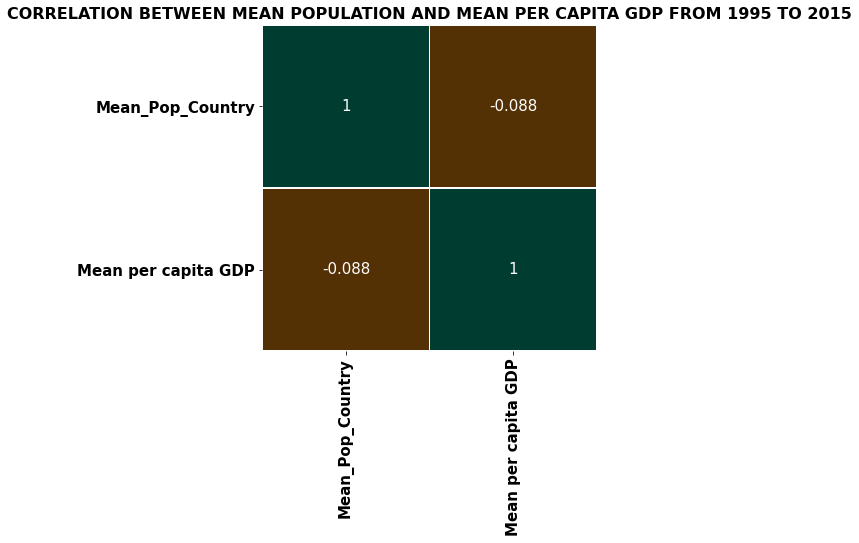

In [73]:
plt.figure(figsize=(6,6))
sns.heatmap(Mean_Pop_GDP_PC, annot=True, cbar= False, cmap = 'BrBG', linewidths=0.5, linecolor = 'w', annot_kws={'size':15})
#plt.ylim([10,10])
plt.xticks(fontsize=15,fontweight='bold', ha = 'center', rotation = 90)
plt.yticks(fontsize=15,fontweight='bold', ha = 'right', rotation = 0)
plt.title('CORRELATION BETWEEN MEAN POPULATION AND MEAN PER CAPITA GDP FROM 1995 TO 2015', fontsize = 16, fontweight = 'bold')
plt.show()

#### The above heatmap shows that there is no correlation between Mean population of each country and Mean percapita GDP